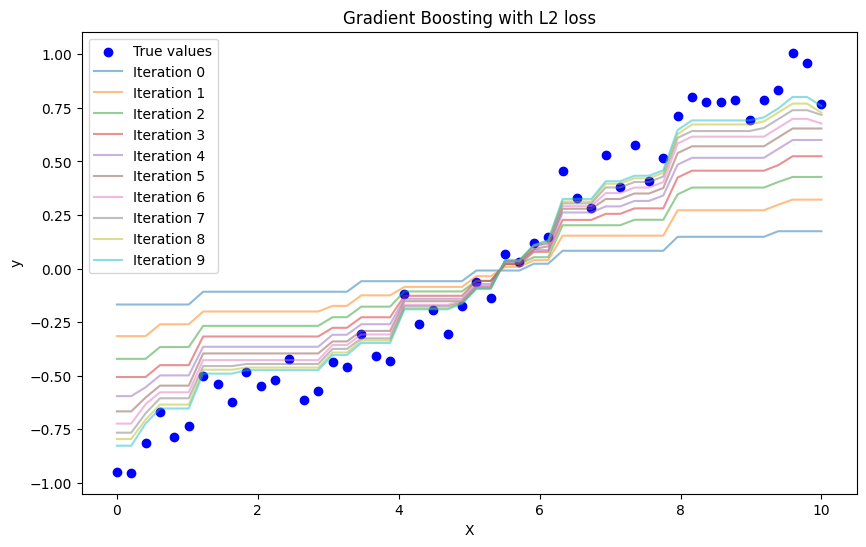

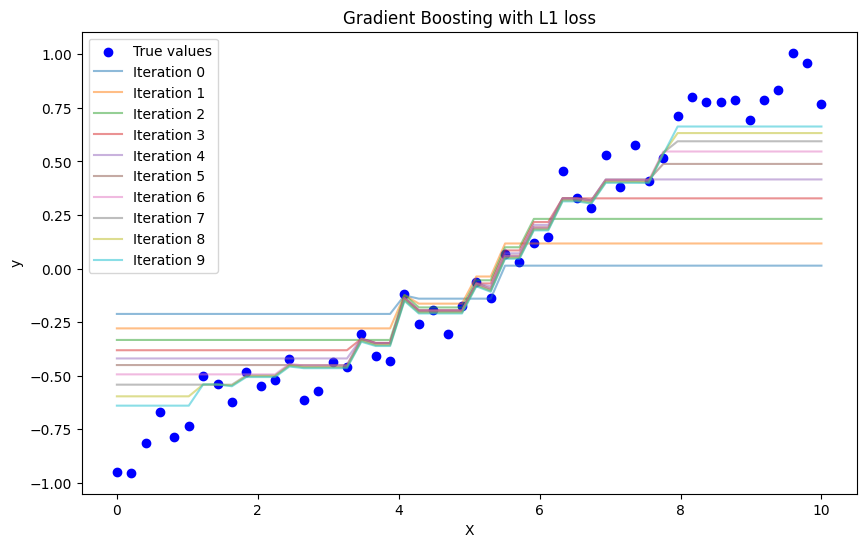

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from scipy.interpolate import BSpline

# Generate toy data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = -1 + 0.2 * X + 0.1 * np.sin(X) + np.random.normal(0, 0.1, size=len(X))

# Define cubic B-Spline with 40 knots
knots = np.linspace(0, 10, 40)
degree = 3
t = [0] * (degree + 1) + list(knots) + [10] * (degree + 1)
spl = BSpline(t, np.eye(len(t) - degree - 1), degree)

# Function to plot the predicted values in each iteration
def plot_predictions(model, X, y, loss_type):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='True values', color='blue')

    # Make predictions at each stage
    for i, y_pred in enumerate(model.staged_predict(X.reshape(-1, 1))):
        if i % 1 == 0:  # Plot every 10 iterations
            plt.plot(X, y_pred, label=f'Iteration {i}', alpha=0.5)

    plt.title(f'Gradient Boosting with {loss_type} loss')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Function to train Gradient Boosting with specified settings
def train_gradient_boosting(X, y, loss, init_value, learning_rate):
    model = GradientBoostingRegressor(loss=loss, n_estimators=10, learning_rate=learning_rate,
                                      init=None, subsample=1.0, random_state=42)

    model.fit(X.reshape(-1, 1), y)

    return model

# Train and visualize with L2 loss
l2_model = train_gradient_boosting(X, y, 'squared_error', np.mean(y), 0.2)
plot_predictions(l2_model, X, y, 'L2')

# Train and visualize with L1 loss
l1_model = train_gradient_boosting(X, y, 'absolute_error', np.median(y), 0.2)
plot_predictions(l1_model, X, y, 'L1')


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

from tqdm import tqdm

def cubic_bspline_basis(t, knots, degree, i, x):
    """
    Compute the ith cubic B-spline basis function at the values x.
    """
    spline = BSpline(t, [0] * (len(knots) + degree + 1), degree)
    return spline(x, i)

def compute_residual(y, y_pred):
    """
    Compute the residual (negative gradient) for regression problems.
    """
    return y - y_pred

def train_gradient_boosting(X, y, n_estimators, learning_rate, knots, degree):
    n_samples = len(X)
    t = [0] * (degree + 1) + list(knots) + [10] * (degree + 1)

    # Initialize the model with the mean for L2 and median for L1
    init_value = np.mean(y)
    y_pred = np.full(n_samples, init_value)

    for _ in tqdm(range(n_estimators)):  # Add tqdm for progress bar
        # Compute the negative gradient (residual)
        residuals = compute_residual(y, y_pred)

        # Fit a cubic B-spline to the negative gradient (residual)
        spline_coeffs = [np.sum(residuals * cubic_bspline_basis(t, knots, degree, i, X)) for i in range(len(knots) + degree)]

        # Update the predictions with the spline approximation
        spline = BSpline(t, spline_coeffs, degree)
        y_pred += learning_rate * spline(X)

        # Visualize the predictions at each iteration
        if _ % 10 == 0:
            plt.plot(X, y_pred, label=f'Iteration {_}', alpha=0.5)

    plt.scatter(X, y, label='True values', color='blue')
    plt.title('Gradient Boosting with custom implementation')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Generate toy data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = -1 + 0.2 * X + 0.1 * np.sin(X) + np.random.normal(0, 0.1, size=len(X))

# Generate toy data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = -1 + 0.2 * X + 0.1 * np.sin(X) + np.random.normal(0, 0.1, size=len(X))

# Train and visualize with custom implementation (reduce parameters)
train_gradient_boosting(X, y, n_estimators=50, learning_rate=0.2, knots=np.linspace(0, 10, 10), degree=3)



  0%|          | 0/50 [00:00<?, ?it/s]

: 

In [3]:
def cubic_bspline_basis(t, knots, degree, i, x):
    """
    Compute the ith cubic B-spline basis function at the values x.
    """
    spline = BSpline(t, [0] * (len(knots) + degree + 1), degree)
    return spline(x, i)

In [5]:
# Set the degree of the B-spline
degree = 3

# Set the number of knots (including the endpoints)
num_knots = 40

# Create equal knots
t = np.linspace(0, 10, num_knots)

# Coefficients (initially set to 0)
spline_coeffs = np.zeros(len(t) + degree - 1)

# Create a B-spline
spline = BSpline(t, spline_coeffs, degree)

In [6]:
spline

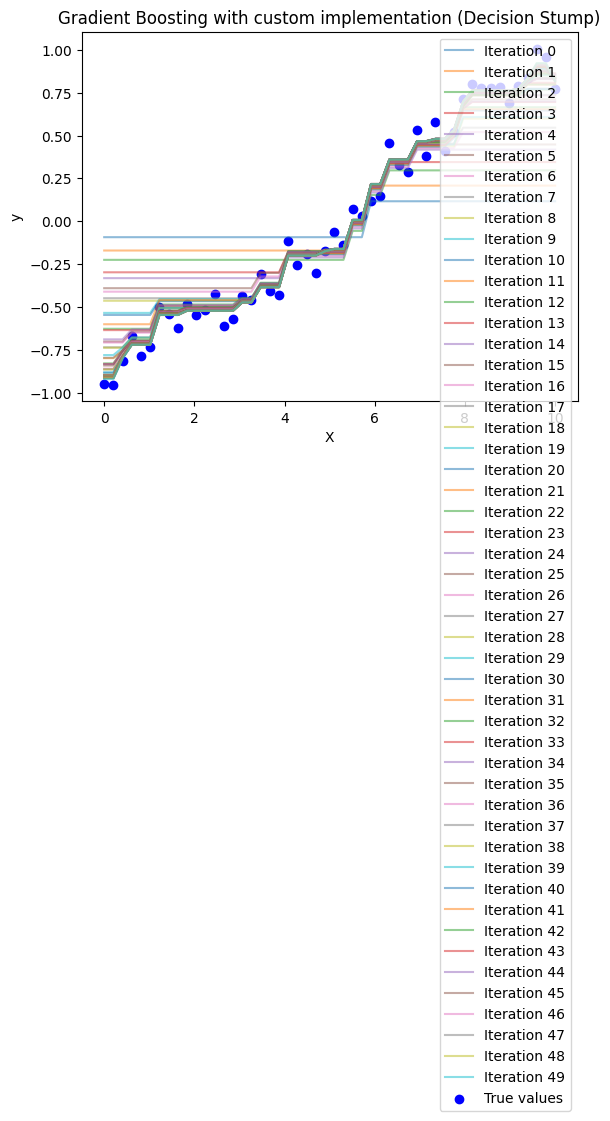

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def train_gradient_boosting(X, y, n_estimators, learning_rate):
    n_samples = len(X)

    # Initialize the model with the mean for L2 and median for L1
    init_value = np.mean(y)
    y_pred = np.full(n_samples, init_value)

    for _ in range(n_estimators):
        # Compute the negative gradient (residual)
        residuals = y - y_pred

        # Fit a decision stump (tree with depth 1) to the negative gradient (residual)
        tree = DecisionTreeRegressor(max_depth=1)
        tree.fit(X.reshape(-1, 1), residuals)

        # Update the predictions with the tree approximation
        y_pred += learning_rate * tree.predict(X.reshape(-1, 1))

        # Visualize the predictions at each iteration
        if _ % 1 == 0:
            plt.plot(X, y_pred, label=f'Iteration {_}', alpha=0.5)

    plt.scatter(X, y, label='True values', color='blue')
    plt.title('Gradient Boosting with custom implementation (Decision Stump)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Generate toy data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = -1 + 0.2 * X + 0.1 * np.sin(X) + np.random.normal(0, 0.1, size=len(X))

# Train and visualize with custom implementation (reduce parameters)
train_gradient_boosting(X, y, n_estimators=50, learning_rate=0.2)


In [52]:
import seaborn as sns 
sns.set_style('darkgrid')
sns.set_palette("mako")

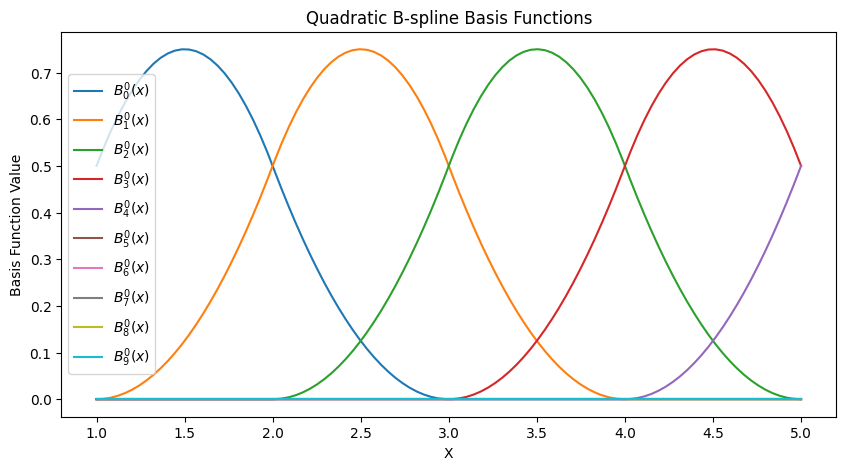

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def bspline_basis_0(x, t, i):
    return np.where((t[i] <= x) & (x < t[i + 1]), 1, 0)

def bspline_basis_1(x, t, i):
    return (x - t[i]) / (t[i + 1] - t[i]) * bspline_basis_0(x, t, i) + (t[i + 2] - x) / (t[i + 2] - t[i + 1]) * bspline_basis_0(x, t, i + 1)

def quadratic_bspline(x, t, i):
    return (x - t[i]) / (t[i + 2] - t[i]) * bspline_basis_1(x, t, i) + (t[i + 3] - x) / (t[i + 3] - t[i + 1]) * bspline_basis_1(x, t, i + 1)

# Knot vector for a quadratic B-spline
t = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Generate X values for visualization
X = np.linspace(1, 5, 100)

# Plot the B-spline basis functions
plt.figure(figsize=(10, 5))

for i in range(len(t) - 3):
    plt.plot(X, quadratic_bspline(X, t, i), label=f'$B_{i}^0(x)$')
    #plt.plot(X, bspline_basis_1(X, t, i), label=f'$B_{i}^1(x)$')
    #plt.plot(X, quadratic_bspline(X, t, i), label=f'$B_{i}^2(x)$', linestyle='--')

plt.title('Quadratic B-spline Basis Functions')
plt.xlabel('X')
plt.ylabel('Basis Function Value')
plt.legend()
plt.show()


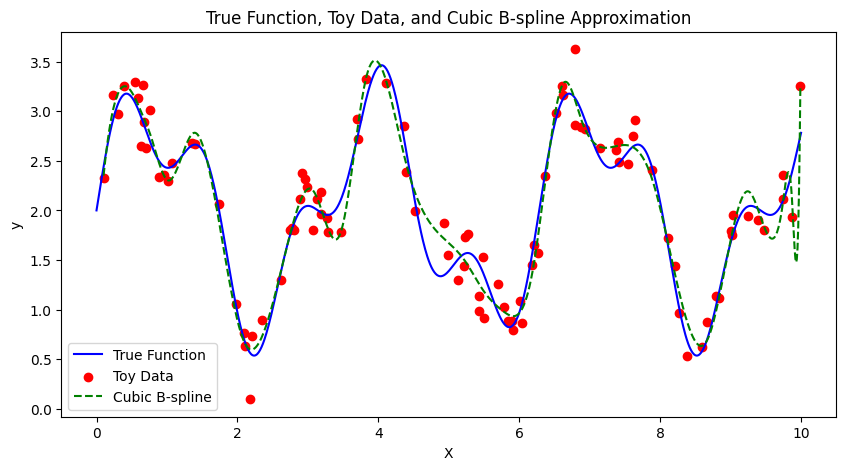

In [47]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Define the true function
def true_function(x):
    return 2 + np.sin(2 * x) + 0.5 * np.sin(5 * x)

# Generate simple toy data with fluctuations
np.random.seed(42)
X_true = np.linspace(0, 10, 1000)
y_true = true_function(X_true)
toy_data_indices = np.random.choice(len(X_true), size=100, replace=False)
toy_data_X = X_true[toy_data_indices]
toy_data_y = true_function(toy_data_X) + np.random.normal(0, 0.2, size=100)

# Sort the input data and reorder the target data accordingly
sort_indices = np.argsort(toy_data_X)
sorted_toy_data_X = toy_data_X[sort_indices]
sorted_toy_data_y = toy_data_y[sort_indices]

# Knot vector for a cubic B-spline
t, c, k = interpolate.splrep(sorted_toy_data_X, sorted_toy_data_y, s=3, k=3)

# Calculate cubic B-spline coefficients
degree = 3
spl =  interpolate.BSpline(t, c, k, extrapolate=False)

# Generate X values for visualization
X_vis = np.linspace(0, 10, 1000)

# Plot the true function and the B-spline approximation
plt.figure(figsize=(10, 5))
plt.plot(X_vis, true_function(X_vis), label='True Function', color='blue')
plt.scatter(toy_data_X, toy_data_y, label='Toy Data', color='red')
plt.plot(X_vis, spl(X_vis), label='Cubic B-spline', linestyle='--', color='green')
plt.title('True Function, Toy Data, and Cubic B-spline Approximation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [48]:
t

array([0.1001001 , 0.1001001 , 0.1001001 , 0.1001001 , 0.66066066,
       0.76076076, 1.01101101, 1.39139139, 2.09209209, 2.75275275,
       3.07307307, 3.46346346, 3.82382382, 4.39439439, 5.22522523,
       5.48548549, 5.78578579, 6.17617618, 6.62662663, 6.87687688,
       7.37737738, 7.87787788, 8.66866867, 9.24924925, 9.73973974,
       9.86986987, 9.98998999, 9.98998999, 9.98998999, 9.98998999])

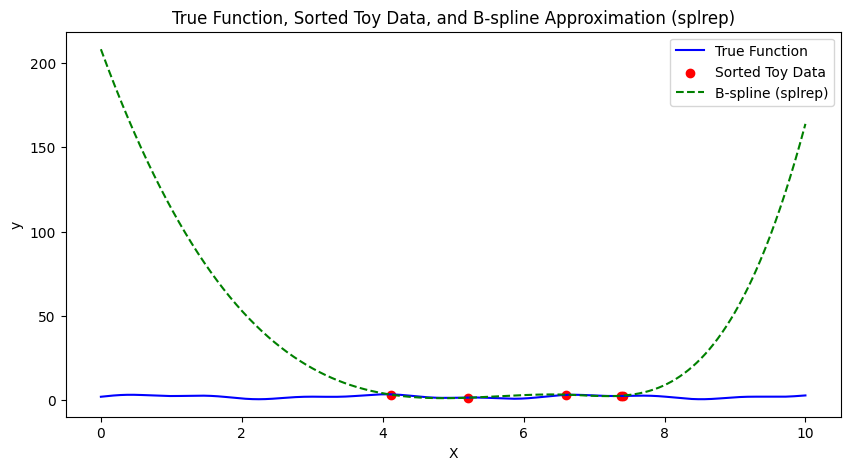

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

# Define the true function
def true_function(x):
    return 2 + np.sin(2 * x) + 0.5 * np.sin(5 * x)

# Generate simple toy data with fluctuations
np.random.seed(42)
X_true = np.linspace(0, 10, 1000)
y_true = true_function(X_true)
toy_data_indices = np.random.choice(len(X_true), size=5, replace=False)
toy_data_X = X_true[toy_data_indices]
toy_data_y = true_function(toy_data_X) + np.random.normal(0, 0.2, size=5)

# Sort the input data and reorder the target data accordingly
sort_indices = np.argsort(toy_data_X)
sorted_toy_data_X = toy_data_X[sort_indices]
sorted_toy_data_y = toy_data_y[sort_indices]

# Use splrep to get B-spline representation
tck = splrep(sorted_toy_data_X, sorted_toy_data_y, k=3)

# Generate X values for visualization
X_vis = np.linspace(0, 10, 1000)

# Evaluate the B-spline representation at X_vis
y_spl = splev(X_vis, tck)

# Plot the true function and the B-spline approximation
plt.figure(figsize=(10, 5))
plt.plot(X_vis, true_function(X_vis), label='True Function', color='blue')
plt.scatter(sorted_toy_data_X, sorted_toy_data_y, label='Sorted Toy Data', color='red')
plt.plot(X_vis, y_spl, label='B-spline (splrep)', linestyle='--', color='green')
plt.title('True Function, Sorted Toy Data, and B-spline Approximation (splrep)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [35]:
toy_data_X

array([5.21521522, 7.37737738, 7.40740741, 6.60660661, 4.11411411])

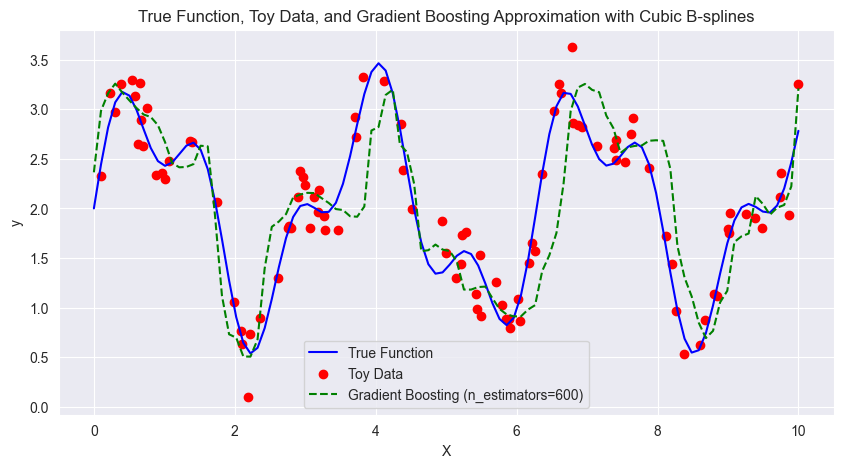

In [102]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Define the true function
def true_function(x):
    return 2 + np.sin(2 * x) + 0.5 * np.sin(5 * x)

# Generate simple toy data with fluctuations
np.random.seed(42)
X_true = np.linspace(0, 10, 1000)
y_true = true_function(X_true)
toy_data_indices = np.random.choice(len(X_true), size=100, replace=False)
toy_data_X = X_true[toy_data_indices]
toy_data_y = true_function(toy_data_X) + np.random.normal(0, 0.2, size=100)

# Sort the input data and reorder the target data accordingly
sort_indices = np.argsort(toy_data_X)
sorted_toy_data_X = toy_data_X[sort_indices]
sorted_toy_data_y = toy_data_y[sort_indices]

# Knot vector for a cubic B-spline
t, c, k = interpolate.splrep(sorted_toy_data_X, sorted_toy_data_y, s=3, k=3)

# Generate X values for visualization
X_vis = np.linspace(0, 10, 100)

# Gradient boosting with cubic B-spline base learners
def compute_residual(y, y_pred):
    """
    Compute the negative gradient (residual) for gradient boosting.
    """
    return y - y_pred

def train_gradient_boosting(X, y, n_estimators, learning_rate, t, c, k):
    """
    Train a gradient boosting model with cubic B-spline base learners.
    """
    # Initialize with the mean of y
    y_pred = np.mean(y)
    
    # Iterate to fit n_estimators base learners
    for _ in range(n_estimators):
        # Compute the negative gradient (residual)
        residuals = compute_residual(y, y_pred)

        # Knot vector for a cubic B-spline
        t, c, k = interpolate.splrep(sorted_toy_data_X, residuals, s=3, k=3)
        
        # Use cubic B-spline as the base learner
        spline = interpolate.BSpline(t, c, k, extrapolate=False)
        
        # Update the predictions with the spline approximation
        y_pred += learning_rate * spline(X)
    
    return y_pred

# Train and visualize the gradient boosting model
n_estimators = 600
learning_rate = 0.1
predicted_values = train_gradient_boosting(sorted_toy_data_X, sorted_toy_data_y, n_estimators, learning_rate, t, c, k)

# Plot the true function, toy data, and gradient boosting approximation
plt.figure(figsize=(10, 5))
plt.plot(X_vis, true_function(X_vis), label='True Function', color='blue')
plt.scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='red')
plt.plot(X_vis, predicted_values, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
plt.title('True Function, Toy Data, and Gradient Boosting Approximation with Cubic B-splines')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [164]:
import sleep

ModuleNotFoundError: No module named 'sleep'

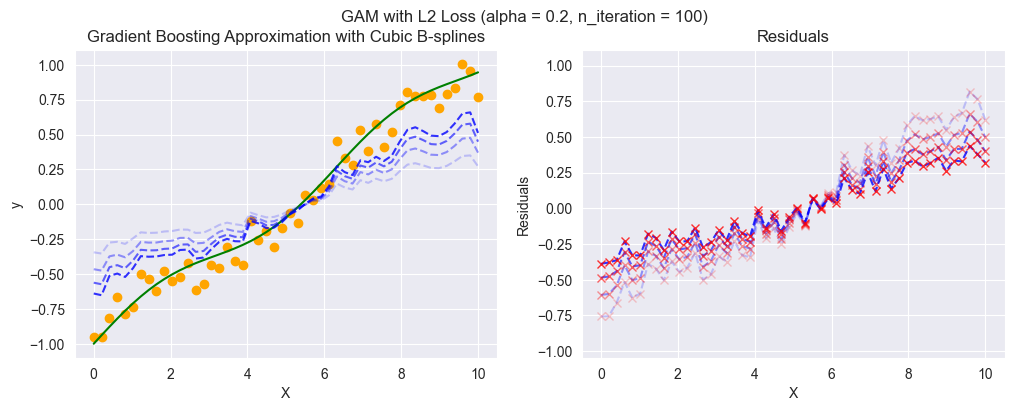

In [201]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation


# Define the true function
def true_function(x):
    return -1 + 0.2 * x + 0.1 * np.sin(x)

# Generate simple toy data with fluctuations
np.random.seed(42)
X_true = np.linspace(0, 10, 50)
y_true = true_function(X_true)
#toy_data_indices = np.random.choice(len(X_true), size=100, replace=False)
toy_data_X = X_true
toy_data_y = true_function(toy_data_X) + np.random.normal(0, 0.1, size=50)

# Sort the input data and reorder the target data accordingly
sort_indices = np.argsort(toy_data_X)
sorted_toy_data_X = toy_data_X[sort_indices]
sorted_toy_data_y = toy_data_y[sort_indices]

# Knot vector for a cubic B-spline
t, c, k = interpolate.splrep(sorted_toy_data_X, sorted_toy_data_y, s=0, k=3)

# Generate X values for visualization
X_vis = np.linspace(0, 10, 50)


# Gradient boosting with cubic B-spline base learners
def compute_residual(y, y_pred):
    """
    Compute the negative gradient (residual) for gradient boosting.
    """
    return y - y_pred

def train_gradient_boosting(X, y, n_estimators, learning_rate, t, c, k, axs):
    """
    Train a gradient boosting model with cubic B-spline base learners.
    """
    # Initialize with the mean of y
    y_pred = np.mean(y)
    
    # Iterate to fit n_estimators base learners
    for _ in range(n_estimators):
        # Compute the negative gradient (residual)
        residuals = compute_residual(y, y_pred)

        # Knot vector for a cubic B-spline
        t, c, k = interpolate.splrep(sorted_toy_data_X, residuals, s=0.1, k=3)
        
        # Use cubic B-spline as the base learner
        spline = interpolate.BSpline(t, c, k, extrapolate=False)
        
        # Update the predictions with the spline approximation
        y_pred += learning_rate * spline(X)
        axs[0].plot(X, y_pred, label=f'Gradient Boosting (i={_})', linestyle='--', color='blue', alpha = _ / n_estimators)
        axs[1].plot(X, residuals, label=f'Residuals (i={_})', linestyle='--', color='blue', alpha = _ / n_estimators, marker='x', mfc='red', mec='red')
        

    
    return y_pred, residuals

# Plot the true function, toy data, and gradient boosting approximation
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(X_vis, true_function(X_vis), label='True Function', color='green')
axs[0].scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='orange')
#axs[0].plot(X_vis, predicted_values, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
axs[0].set_title('Gradient Boosting Approximation with Cubic B-splines')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')


# Plot the true function, toy data, and gradient boosting approximation
#axs[1].scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='red')
#axs[1].plot(X_vis, residuals, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
axs[1].set_title('Residuals')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Residuals')

fig.suptitle(f'GAM with L2 Loss (alpha = {learning_rate}, n_iteration = {n_estimators})')

# Train and visualize the gradient boosting model
n_estimators = 5
learning_rate = 0.2
predicted_values, residuals = train_gradient_boosting(sorted_toy_data_X, sorted_toy_data_y, n_estimators, learning_rate, t, c, k, axs=axs)


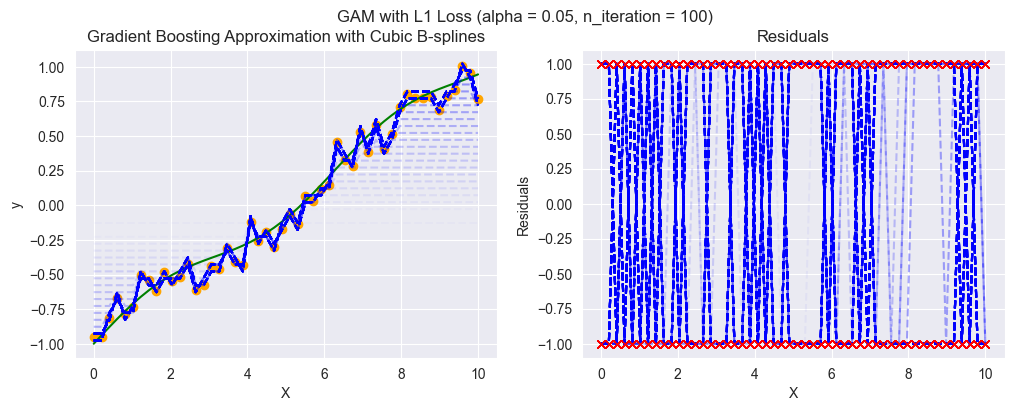

In [192]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Define the true function
def true_function(x):
    return -1 + 0.2 * x + 0.1 * np.sin(x)

# Generate simple toy data with fluctuations
np.random.seed(42)
X_true = np.linspace(0, 10, 50)
y_true = true_function(X_true)
#toy_data_indices = np.random.choice(len(X_true), size=100, replace=False)
toy_data_X = X_true
toy_data_y = true_function(toy_data_X) + np.random.normal(0, 0.1, size=50)

# Sort the input data and reorder the target data accordingly
sort_indices = np.argsort(toy_data_X)
sorted_toy_data_X = toy_data_X[sort_indices]
sorted_toy_data_y = toy_data_y[sort_indices]

# Knot vector for a cubic B-spline
t, c, k = interpolate.splrep(sorted_toy_data_X, sorted_toy_data_y, s=0, k=3)

# Generate X values for visualization
X_vis = np.linspace(0, 10, 50)


# Gradient boosting with cubic B-spline base learners
def compute_residual(y, y_pred):
    """
    Compute the negative gradient (residual) for gradient boosting.
    """
    return np.sign(y - y_pred)

def train_gradient_boosting(X, y, n_estimators, learning_rate, t, c, k, axs):
    """
    Train a gradient boosting model with cubic B-spline base learners.
    """
    # Initialize with the mean of y
    y_pred = np.median(y)
    axs[0].plot(X, np.median(y) * np.ones(50), label=f'Gradient Boosting (i={1})', linestyle='--', color='blue', alpha = 1 / n_estimators)
    


    
    # Iterate to fit n_estimators base learners
    for _ in range(n_estimators):
        # Compute the negative gradient (residual)
        residuals = compute_residual(y, y_pred)

        # Knot vector for a cubic B-spline
        t, c, k = interpolate.splrep(sorted_toy_data_X, residuals, s=0, k=3)
        
        # Use cubic B-spline as the base learner
        spline = interpolate.BSpline(t, c, k, extrapolate=False)
        
        # Update the predictions with the spline approximation
        y_pred += learning_rate * spline(X)
        axs[0].plot(X, y_pred, label=f'Gradient Boosting (i={_})', linestyle='--', color='blue', alpha = _ / n_estimators)
        axs[1].plot(X, residuals, label=f'Residuals (i={_})', linestyle='--', color='blue', alpha = _ / n_estimators, marker='x', mfc='red', mec='red')
        

    
    return y_pred, residuals

# Plot the true function, toy data, and gradient boosting approximation
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(X_vis, true_function(X_vis), label='True Function', color='green')
axs[0].scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='orange')
#axs[0].plot(X_vis, predicted_values, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
axs[0].set_title('Gradient Boosting Approximation with Cubic B-splines')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')


# Plot the true function, toy data, and gradient boosting approximation
#axs[1].scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='red')
#axs[1].plot(X_vis, residuals, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
axs[1].set_title('Residuals')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Residuals')

fig.suptitle(f'GAM with L1 Loss (alpha = {learning_rate}, n_iteration = {n_estimators})')

# Train and visualize the gradient boosting model
n_estimators = 50
learning_rate = 0.05
predicted_values, residuals = train_gradient_boosting(sorted_toy_data_X, sorted_toy_data_y, n_estimators, learning_rate, t, c, k, axs=axs)


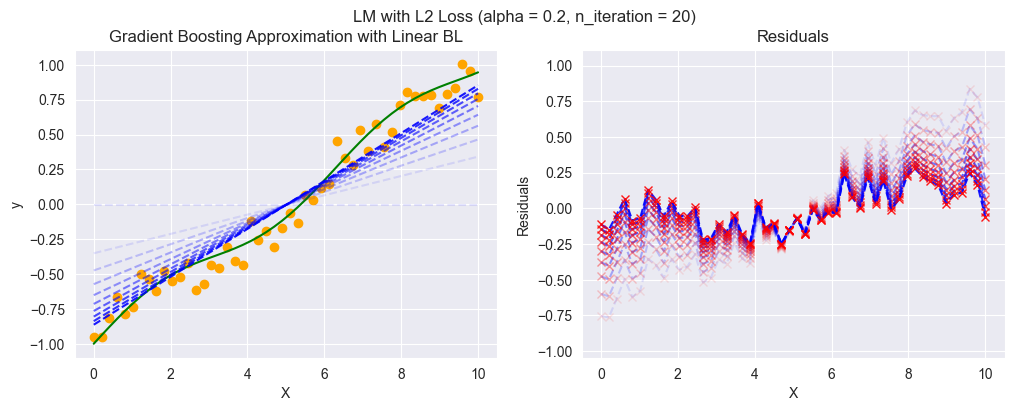

In [205]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression


# Define the true function
def true_function(x):
    return -1 + 0.2 * x + 0.1 * np.sin(x)

# Generate simple toy data with fluctuations
np.random.seed(42)
X_true = np.linspace(0, 10, 50)
y_true = true_function(X_true)
#toy_data_indices = np.random.choice(len(X_true), size=100, replace=False)
toy_data_X = X_true
toy_data_y = true_function(toy_data_X) + np.random.normal(0, 0.1, size=50)

# Sort the input data and reorder the target data accordingly
sort_indices = np.argsort(toy_data_X)
sorted_toy_data_X = toy_data_X[sort_indices]
sorted_toy_data_y = toy_data_y[sort_indices]


# Generate X values for visualization
X_vis = np.linspace(0, 10, 50)


# Gradient boosting with cubic B-spline base learners
def compute_residual(y, y_pred):
    """
    Compute the negative gradient (residual) for gradient boosting.
    """
    return y - y_pred

def train_gradient_boosting(X, y, n_estimators, learning_rate, t, c, k, axs):
    """
    Train a gradient boosting model with cubic B-spline base learners.
    """
    # Initialize with the mean of y
    y_pred = np.mean(y)
    axs[0].plot(X, y_pred * np.ones(50), label=f'Gradient Boosting (i={0})', linestyle='--', color='blue', alpha = 1 / n_estimators)

    
    # Iterate to fit n_estimators base learners
    for _ in range(n_estimators):
        # Compute the negative gradient (residual)
        residuals = compute_residual(y, y_pred)

        # Knot vector for a cubic B-spline
        model = LinearRegression()
        model.fit(X.reshape(-1, 1), residuals)

        # Update the predictions with the spline approximation
        y_pred += learning_rate * model.predict(X.reshape(-1, 1))
        axs[0].plot(X, y_pred, label=f'Gradient Boosting (i={_})', linestyle='--', color='blue', alpha = _ / n_estimators)
        axs[1].plot(X, residuals, label=f'Residuals (i={_})', linestyle='--', color='blue', alpha = _ / n_estimators, marker='x', mfc='red', mec='red')
        

    
    return y_pred, residuals

# Plot the true function, toy data, and gradient boosting approximation
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(X_vis, true_function(X_vis), label='True Function', color='green')
axs[0].scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='orange')
#axs[0].plot(X_vis, predicted_values, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
axs[0].set_title('Gradient Boosting Approximation with Linear BL')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')


# Plot the true function, toy data, and gradient boosting approximation
#axs[1].scatter(sorted_toy_data_X, sorted_toy_data_y, label='Toy Data', color='red')
#axs[1].plot(X_vis, residuals, label=f'Gradient Boosting (n_estimators={n_estimators})', linestyle='--', color='green')
axs[1].set_title('Residuals')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Residuals')

fig.suptitle(f'LM with L2 Loss (alpha = {learning_rate}, n_iteration = {n_estimators})')

# Train and visualize the gradient boosting model
n_estimators = 10
learning_rate = 0.2
predicted_values, residuals = train_gradient_boosting(sorted_toy_data_X, sorted_toy_data_y, n_estimators, learning_rate, t, c, k, axs=axs)


In [207]:
np.exp(np.log(2)) /  (1+np.exp(np.log(2)))

0.6666666666666666

In [11]:
import pandas as pd 
data = pd.read_clipboard()
data.Note = data.Note.apply(lambda x: x.replace(",", '.'))
data.Note = data.Note.astype('float')

<Axes: >

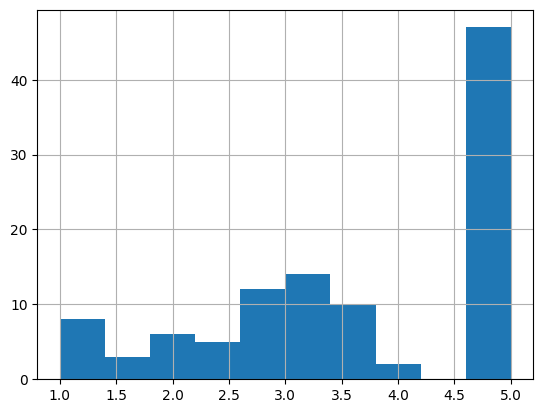

In [13]:
data.Note.hist()

In [37]:
import numpy as np

def g(x):
    return -np.sin(2 * (4 * x - 2)) + 2 * np.exp(-(16 ** 2) * (x - 0.5) ** 2) + x**8

# Example usage:
x_values = np.linspace(0, 1, 100)
y_values = g(x_values)


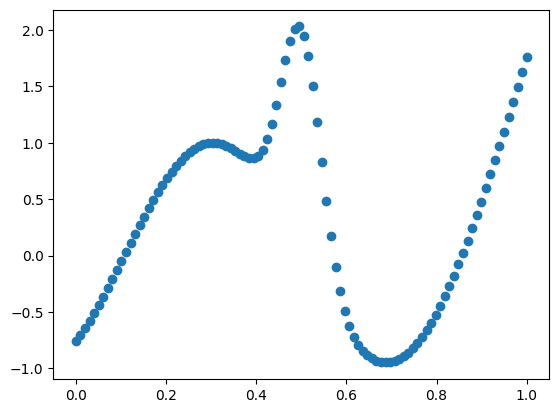

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x_values, y_values)